In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('quora.csv')

In [7]:
df.head(5)

Unnamed: 0   index      id    qid1    qid2  \
0           0    8067    8067   15738   15739   
1           1  368101  368101   12736  104117   
2           2   70497   70497  121486  121487   
3           3  226567  226567  254474  258192   
4           4   73186   73186   48103    3062   

                                           question1  \
0                 How do I play Pokémon GO in Korea?   
1  What are some of the best side dishes for crab...   
2  Which is more advisable and better material fo...   
3       How do I improve logical programming skills?   
4             How close we are to see 3rd world war?   

                                           question2  is_duplicate  
0                 How do I play Pokémon GO in China?             0  
1  What are some good side dishes for buffalo chi...             0  
2      What is the best server setup for buddypress?             0  
3  How can I improve my logical skills for progra...             1  
4                      How close is a World War III?             1

In [6]:
df.shape

(100000, 8)

In [13]:
df=df.iloc[:,2:]

In [14]:
df

id    qid1    qid2  \
3      226567  254474  258192   
4       73186   48103    3062   
5      215105  177688   83888   
6      253209  367707  153452   
7      354651  483796   11244   
...       ...     ...     ...   
99995  324747  259890  450891   
99996  178059  273563  273564   
99997  385348  339816  517487   
99998   35290   64515   64516   
99999  225896   10268  334357   

                                               question1  \
3           How do I improve logical programming skills?   
4                 How close we are to see 3rd world war?   
5       What do Chinese people think about Donald Trump?   
6        How many hours a week do Google employees work?   
7      How can we follow a Quora question privately w...   
...                                                  ...   
99995               How do I market my software product?   
99996  I imagine stabbing people in the throat all th...   
99997        What is the best online English dictionary?   
99998                Which are some good english movies?   
99999                            How does a skunk spray?   

                                               question2  is_duplicate  
3      How can I improve my logical skills for progra...             1  
4                          How close is a World War III?             1  
5          What do Chinese people think of Donald Trump?             1  
6      How many hours a day do Google employees work ...             0  
7      How can we view private Instagram pictures wit...             0  
...                                                  ...           ...  
99995                How do I market a software product?             1  
99996  Where online can I track how the California pr...             0  
99997         What’s the best online english dictionary?             1  
99998    What are your favourite 10/10 Hollywood movies?             0  
99999                               How do skunks spray?             1  

[99997 rows x 6 columns]

In [15]:
df.shape

(99997, 6)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99997 entries, 3 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            99997 non-null  int64 
 1   qid1          99997 non-null  int64 
 2   qid2          99997 non-null  int64 
 3   question1     99997 non-null  object
 4   question2     99997 non-null  object
 5   is_duplicate  99997 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.6+ MB


In [18]:
df.sample(10)

id    qid1    qid2  \
66949   12748     876   14931   
7729    23528   44061   44062   
30939  112326  183810  183811   
70700  119809  194445  194446   
97002  359937  489643  489644   
925    136759  218125  141091   
25774     288     576     577   
84269  181433  277946  277947   
68683   87024  146634  146635   
88150   50480   89678   23250   

                                               question1  \
66949  What are your views on Modi governments decisi...   
7729   Why are there so many stigmas surrounding ment...   
30939  Which are the best Drug or Alcohol Rehab, Deto...   
70700   What was the greatest "buddy movie" of all time?   
97002        My iPhone is disabled what should I do now?   
925                What is dark web? What happens there?   
25774              How do you deal with a fear of dying?   
84269  What's preventing Microsoft from assigning the...   
68683  Is the low probability of the creation of a fu...   
88150  Does hypnosis work like in the movie Now You S...   

                                               question2  is_duplicate  
66949  How do you see the PM Modi’s move of banning o...             1  
7729        How can we end the stigma of mental illness?             0  
30939  Which is the best Drug Rehab or Recovery Progr...             1  
70700          What are the greatest movies of all time?             0  
97002         What should I do if my iPhone is disabled?             1  
925                                What is the dark web?             1  
25774             How can you reduce your fear of dying?             1  
84269  Why did Microsoft choose for the default drive...             0  
68683  How would you explain evolution in terms of ba...             0  
88150  I cant join military forces due to my poor eye...             0

In [19]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
# Distribution of  duplicate and non duplicate questions

is_duplicate
0    62876
1    37121
Name: count, dtype: int64
is_duplicate
0    62.877886
1    37.122114
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

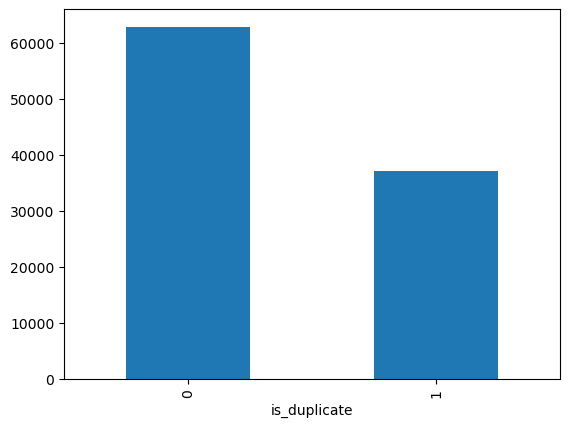

In [24]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [25]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 166202
Number of questions getting repeated 19068


In [28]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [29]:
new_df = df.sample(30000)

In [30]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [31]:
new_df.duplicated().sum()

0

In [32]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
53427  How do I erase all my answers and question on ...   
56608                          What causes soil erosion?   
59781  I am a housewife and doing graduation but I wa...   
53681     Why has Arnab Goswami resigned from Times Now?   
47390  For older parents (over 40) with kids between ...   

                                             question2  
53427      How do I delete my own question from Quora?  
56608             What are the causes of soil erosion?  
59781                           How is health, wealth?  
53681        Is Arnab Goswami quitting from Times now?  
47390  What apps do 3- to 6-year-old German kids like?

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [34]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

temp_df

In [36]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.733

# BOW with basic features

## Feature engineering

In [40]:
new_df = df.sample(30000,random_state=2)

In [41]:

new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [42]:
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  
45915  Can you love someone without knowing that you ...             0  
8842   What is the best platform/tools for testing a ...             0  
60561  What are some good ideas for a senior photogra...             1  
47062  How can I backup my SD memory offline in Android?             0  
63413  Is it true there are no longer any countries w...             0

In [49]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [50]:
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  Can you love someone without knowing that you ...             0   
8842   What is the best platform/tools for testing a ...             0   
60561  What are some good ideas for a senior photogra...             1   
47062  How can I backup my SD memory offline in Android?             0   
63413  Is it true there are no longer any countries w...             0   

       q1_len  q2_len  
45915      53      56  
8842       72      55  
60561      53      58  
47062      63      49  
63413      53      70

In [51]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  Can you love someone without knowing that you ...             0   
8842   What is the best platform/tools for testing a ...             0   
60561  What are some good ideas for a senior photogra...             1   
47062  How can I backup my SD memory offline in Android?             0   
63413  Is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  
45915      53      56            10            10  
8842       72      55            13            10  
60561      53      58             9            10  
47062      63      49            13            10  
63413      53      70            10            14

In [52]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [53]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  Can you love someone without knowing that you ...             0   
8842   What is the best platform/tools for testing a ...             0   
60561  What are some good ideas for a senior photogra...             1   
47062  How can I backup my SD memory offline in Android?             0   
63413  Is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  
45915      53      56            10            10            6  
8842       72      55            13            10            6  
60561      53      58             9            10            9  
47062      63      49            13            10            5  
63413      53      70            10            14            6

In [54]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [56]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  Can you love someone without knowing that you ...             0   
8842   What is the best platform/tools for testing a ...             0   
60561  What are some good ideas for a senior photogra...             1   
47062  How can I backup my SD memory offline in Android?             0   
63413  Is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
45915      53      56            10            10            6          17  
8842       72      55            13            10            6          23  
60561      53      58             9            10            9          19  
47062      63      49            13            10            5          23  
63413      53      70            10            14            6          24

In [57]:

new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  Can you love someone without knowing that you ...             0   
8842   What is the best platform/tools for testing a ...             0   
60561  What are some good ideas for a senior photogra...             1   
47062  How can I backup my SD memory offline in Android?             0   
63413  Is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
45915      53      56            10            10            6          17   
8842       72      55            13            10            6          23   
60561      53      58             9            10            9          19   
47062      63      49            13            10            5          23   
63413      53      70            10            14            6          24   

       word_share  
45915        0.35  
8842         0.26  
60561        0.47  
47062        0.22  
63413        0.25

minimum characters 1
maximum characters 430
average num of characters 59


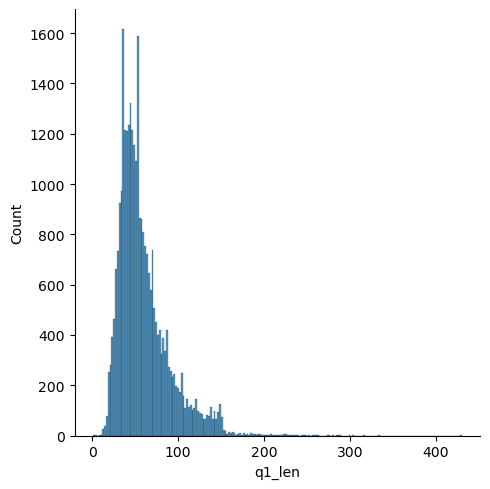

In [59]:
# Analysis of features
import seaborn as sns
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 10
maximum characters 558
average num of characters 60


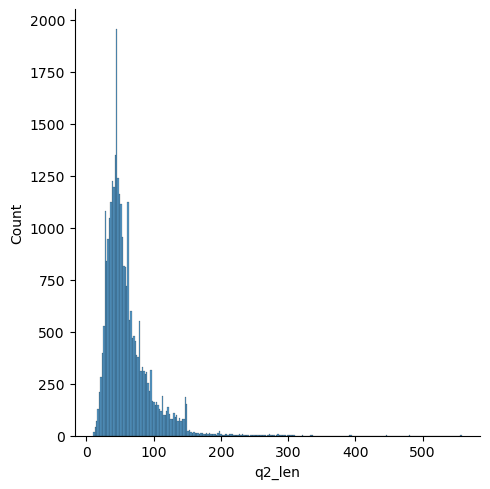

In [60]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

In [61]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 81
average num of words 10


In [62]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

minimum words 2
maximum words 111
average num of words 11


C:\Users\manda\AppData\Local\Temp\ipykernel_10296\2492214095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
C:\Users\manda\AppData\Local\Temp\ipykernel_10296\2492214095.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

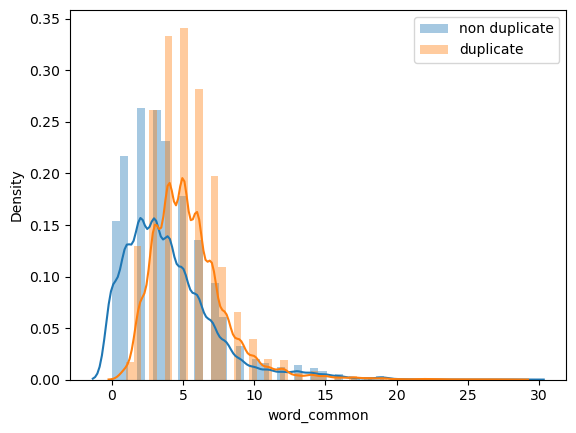

In [63]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

In [64]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\manda\AppData\Local\Temp\ipykernel_10296\2776808923.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
C:\Users\manda\AppData\Local\Temp\ipykernel_10296\2776808923.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

C:\Users\manda\AppData\Local\Temp\ipykernel_10296\542246512.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\manda\AppData\Local\Temp\ipykernel_10296\542246512.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

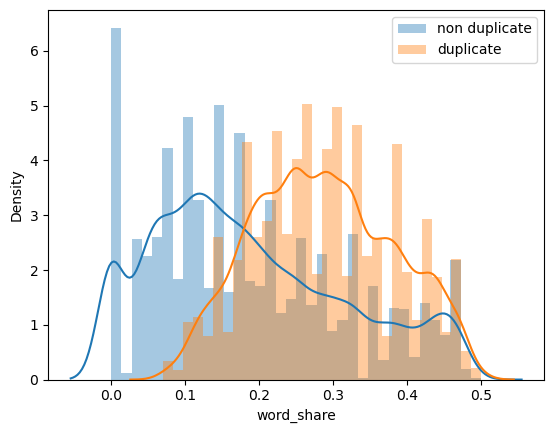

In [66]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [67]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
45915  Can you love someone without being in love wit...   
8842   What is the best practise to generate WADL for...   
60561  What are some ideas for a photography senior p...   
47062  How do I save a web page for offline reading i...   
63413  Are there any countries that start with the le...   

                                               question2  
45915  Can you love someone without knowing that you ...  
8842   What is the best platform/tools for testing a ...  
60561  What are some good ideas for a senior photogra...  
47062  How can I backup my SD memory offline in Android?  
63413  Is it true there are no longer any countries w...

In [68]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
45915             0      53      56            10            10            6   
8842              0      72      55            13            10            6   
60561             1      53      58             9            10            9   
47062             0      63      49            13            10            5   
63413             0      53      70            10            14            6   

       word_total  word_share  
45915          17        0.35  
8842           23        0.26  
60561          19        0.47  
47062          23        0.22  
63413          24        0.25

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [70]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [71]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
45915             0      53      56            10            10            6   
8842              0      72      55            13            10            6   
60561             1      53      58             9            10            9   
47062             0      63      49            13            10            5   
63413             0      53      70            10            14            6   

       word_total  word_share  0  1  ...  2990  2991  2992  2993  2994  2995  \
45915          17        0.35  0  0  ...     0     0     2     0     0     0   
8842           23        0.26  0  0  ...     0     0     0     0     0     0   
60561          19        0.47  0  0  ...     0     0     0     0     0     0   
47062          23        0.22  0  0  ...     0     0     0     0     0     0   
63413          24        0.25  0  0  ...     0     0     0     0     0     0   

       2996  2997  2998  2999  
45915     0     0     0     0  
8842      0     0     0     0  
60561     0     0     0     0  
47062     0     0     0     0  
63413     0     0     0     0  

[5 rows x 6008 columns]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7721666666666667

# With preprocessing and advanced features

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [75]:
new_df = df.sample(30000,random_state=2)

In [76]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [79]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [80]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [81]:
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  
45915  can you love someone without knowing that you ...             0  
8842   what is the best platform tools for testing a ...             0  
60561  what are some good ideas for a senior photogra...             1  
47062   how can i backup my sd memory offline in android             0  
63413  is it true there are no longer any countries w...             0

In [82]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [83]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  
45915      52      55            10            10  
8842       71      54            14            11  
60561      52      57             9            10  
47062      62      48            13            10  
63413      52      69            10            14

In [84]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [85]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  
45915      52      55            10            10            6  
8842       71      54            14            11            7  
60561      52      57             9            10            9  
47062      62      48            13            10            5  
63413      52      69            10            14            6

In [86]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [87]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
45915      52      55            10            10            6          17  
8842       71      54            14            11            7          25  
60561      52      57             9            10            9          19  
47062      62      48            13            10            5          23  
63413      52      69            10            14            6          24

In [88]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
45915      52      55            10            10            6          17   
8842       71      54            14            11            7          25   
60561      52      57             9            10            9          19   
47062      62      48            13            10            5          23   
63413      52      69            10            14            6          24   

       word_share  
45915        0.35  
8842         0.28  
60561        0.47  
47062        0.22  
63413        0.25

In [89]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [90]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [91]:
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
45915      52      55            10            10  ...          17   
8842       71      54            14            11  ...          25   
60561      52      57             9            10  ...          19   
47062      62      48            13            10  ...          23   
63413      52      69            10            14  ...          24   

       word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
45915        0.35  0.999967  0.749981  0.749981  0.499992  0.599994  0.599994   
8842         0.28  0.499992  0.374995  0.799984  0.666656  0.636358  0.499996   
60561        0.47  0.999975  0.799984  0.999980  0.999980  0.999989  0.899991   
47062        0.22  0.399992  0.285710  0.599988  0.499992  0.499995  0.384612   
63413        0.25  0.499988  0.285710  0.666656  0.571420  0.599994  0.428568   

       last_word_eq  first_word_eq  
45915           1.0            1.0  
8842            0.0            1.0  
60561           1.0            1.0  
47062           1.0            1.0  
63413           1.0            0.0  

[5 rows x 21 columns]

In [93]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [111]:
def fetch_length_features(row):
    length_features = [0, 0, 0]  # Initialize length_features
    q1 = row['question1']
    q2 = row['question2']
    length_features[0] = abs(len(q1) - len(q2))
    length_features[1] = (len(q1) + len(q2)) / 2
    
    # Check if strs is not empty before accessing its elements
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


In [112]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [113]:
new_df.head()

id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
45915      52      55            10            10  ...  0.599994   
8842       71      54            14            11  ...  0.499996   
60561      52      57             9            10  ...  0.899991   
47062      62      48            13            10  ...  0.384612   
63413      52      69            10            14  ...  0.428568   

       last_word_eq  first_word_eq  fuzz_ratio  fuzz_partial_ratio  \
45915           1.0            1.0          80                  77   
8842            0.0            1.0          69                  63   
60561           1.0            1.0          83                  77   
47062           1.0            1.0          60                  56   
63413           1.0            0.0          55                  60   

       token_sort_ratio  token_set_ratio  abs_len_diff  mean_len  \
45915                79               86             3      53.5   
8842                 62               70            17      62.5   
60561                95              100             5      54.5   
47062                53               67            14      55.0   
63413                64               73            17      60.5   

       longest_substr_ratio  
45915              0.547170  
8842               0.327273  
60561              0.264151  
47062              0.183673  
63413              0.283019  

[5 rows x 28 columns]

In [114]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [115]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [116]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
45915  213056  182877  318279   
8842    52056   92233   92234   
60561  220586  327711  327712   
47062   39416   71452   71453   
63413  222877  330562  330563   

                                               question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  is_duplicate  \
45915  can you love someone without knowing that you ...             0   
8842   what is the best platform tools for testing a ...             0   
60561  what are some good ideas for a senior photogra...             1   
47062   how can i backup my sd memory offline in android             0   
63413  is it true there are no longer any countries w...             0   

       q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
45915      52      55            10            10  ...  0.599994   
8842       71      54            14            11  ...  0.499996   
60561      52      57             9            10  ...  0.899991   
47062      62      48            13            10  ...  0.384612   
63413      52      69            10            14  ...  0.428568   

       last_word_eq  first_word_eq  fuzz_ratio  fuzz_partial_ratio  \
45915           1.0            1.0          80                  77   
8842            0.0            1.0          69                  63   
60561           1.0            1.0          83                  77   
47062           1.0            1.0          60                  56   
63413           1.0            0.0          55                  60   

       token_sort_ratio  token_set_ratio  abs_len_diff  mean_len  \
45915                79               86             3      53.5   
8842                 62               70            17      62.5   
60561                95              100             5      54.5   
47062                53               67            14      55.0   
63413                64               73            17      60.5   

       longest_substr_ratio  
45915              0.547170  
8842               0.327273  
60561              0.264151  
47062              0.183673  
63413              0.283019  

[5 rows x 28 columns]

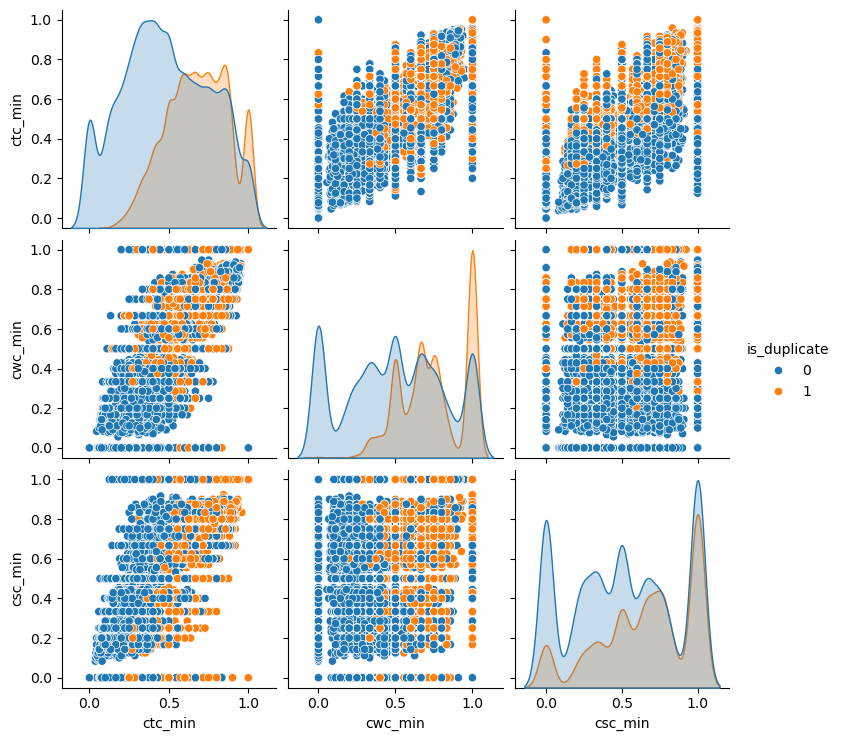

In [104]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

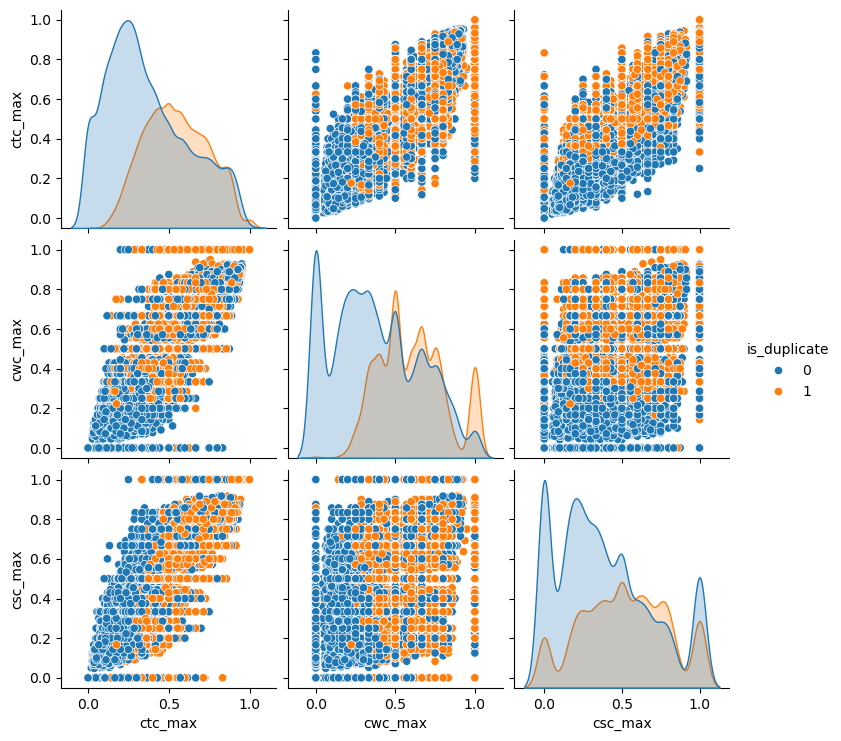

In [105]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

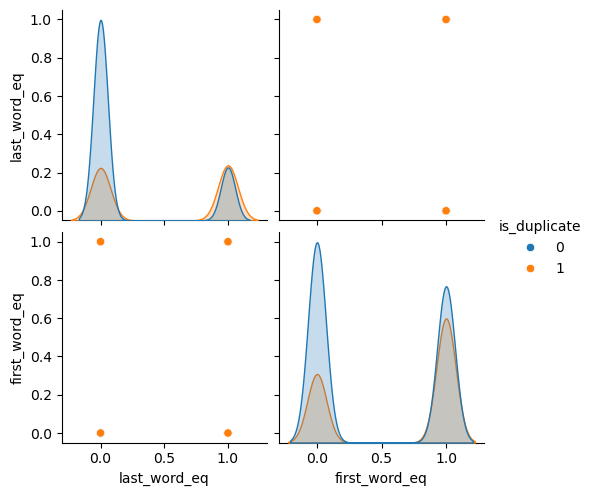

In [106]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [117]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

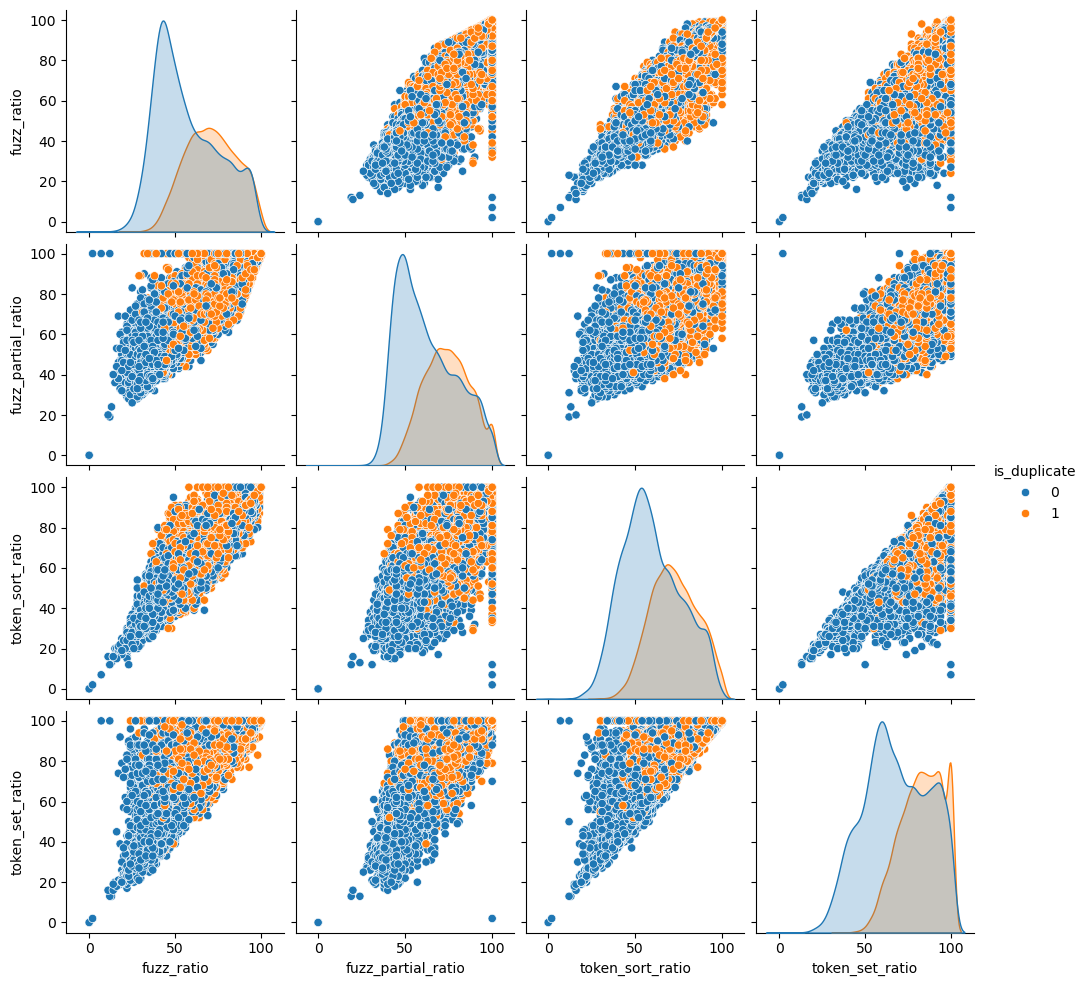

In [118]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [119]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [120]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.175s...
[t-SNE] Computed neighbors for 30000 samples in 17.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

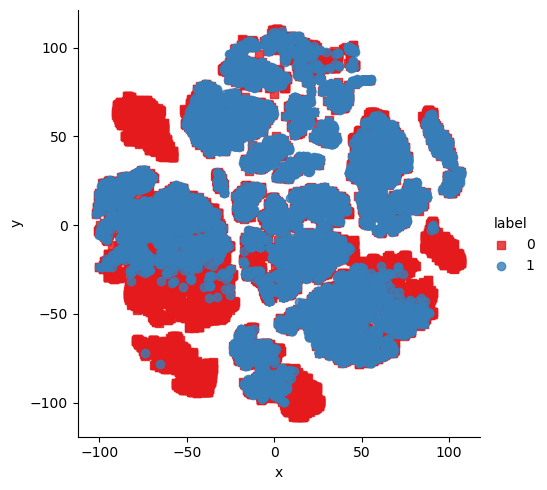

In [122]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['s','o'])

In [123]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.139s...
[t-SNE] Computed neighbors for 30000 samples in 15.383s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sa

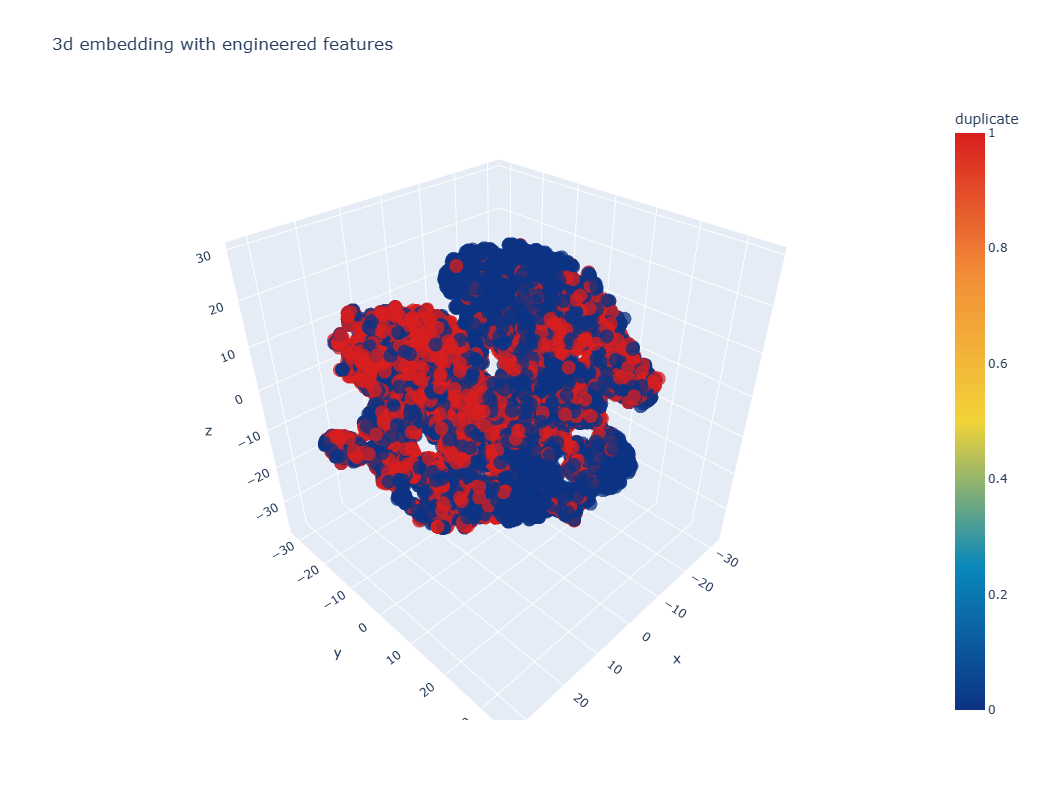

In [124]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [125]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
45915  can you love someone without being in love wit...   
8842   what is the best practise to generate wadl for...   
60561  what are some ideas for a photography senior p...   
47062  how do i save a web page for offline reading i...   
63413  are there any countries that start with the le...   

                                               question2  
45915  can you love someone without knowing that you ...  
8842   what is the best platform tools for testing a ...  
60561  what are some good ideas for a senior photogra...  
47062   how can i backup my sd memory offline in android  
63413  is it true there are no longer any countries w...

In [126]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
45915             0      52      55            10            10            6   
8842              0      71      54            14            11            7   
60561             1      52      57             9            10            9   
47062             0      62      48            13            10            5   
63413             0      52      69            10            14            6   

       word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
45915          17        0.35  0.999967  0.749981  ...  0.599994   
8842           25        0.28  0.499992  0.374995  ...  0.499996   
60561          19        0.47  0.999975  0.799984  ...  0.899991   
47062          23        0.22  0.399992  0.285710  ...  0.384612   
63413          24        0.25  0.499988  0.285710  ...  0.428568   

       last_word_eq  first_word_eq  fuzz_ratio  fuzz_partial_ratio  \
45915           1.0            1.0          80                  77   
8842            0.0            1.0          69                  63   
60561           1.0            1.0          83                  77   
47062           1.0            1.0          60                  56   
63413           1.0            0.0          55                  60   

       token_sort_ratio  token_set_ratio  abs_len_diff  mean_len  \
45915                79               86             3      53.5   
8842                 62               70            17      62.5   
60561                95              100             5      54.5   
47062                53               67            14      55.0   
63413                64               73            17      60.5   

       longest_substr_ratio  
45915              0.547170  
8842               0.327273  
60561              0.264151  
47062              0.183673  
63413              0.283019  

[5 rows x 23 columns]

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [128]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
45915             0      52      55            10            10            6   
8842              0      71      54            14            11            7   
60561             1      52      57             9            10            9   
47062             0      62      48            13            10            5   
63413             0      52      69            10            14            6   

       word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
45915          17        0.35  0.999967  0.749981  ...     0     0     2   
8842           25        0.28  0.499992  0.374995  ...     0     0     0   
60561          19        0.47  0.999975  0.799984  ...     0     0     0   
47062          23        0.22  0.399992  0.285710  ...     0     0     0   
63413          24        0.25  0.499988  0.285710  ...     0     0     0   

       2993  2994  2995  2996  2997  2998  2999  
45915     0     0     0     0     0     0     0  
8842      0     0     0     0     0     0     0  
60561     0     0     0     0     0     0     0  
47062     0     0     0     0     0     0     0  
63413     0     0     0     0     0     0     0  

[5 rows x 6023 columns]

In [129]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7936666666666666

In [131]:
# In this case,we get most accurate results

In [133]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [134]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [135]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [136]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [137]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [156]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [161]:
q1 = 'What is the current condition of your dog?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Is Lahore current capital of Pakistan?' 

In [163]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)